In [82]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#### 1.1 Import the CSV files

In [83]:
student_df = pd.read_csv("data/StudentsPerformance.csv")
student_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### 1.1.1 Show top 5 records

In [84]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 1.1.2 Show the shape of the dataset

In [85]:
student_df.shape

(1000, 8)

#### 1.2 Dataset Information
* gender = Male/Female
* race/ethnticity = Groups(A, B, C, D, E)
* parental level of education = parents final education = (bachelors degree, some college, master's degree, associate's degree, high school)
* lunch = having lunch before test(standard/ free lunch)
* test preparation course = complete or not complete before test
* math score
* reading score
* writing score

#### 1.3 Data checks to perform
* Check Missing Values
* Check Duplicates
* Check Data Type
* Check the number of unique values in each column
* Check data stastics
* Check various categories present in different categorical columns

#### 1.3.1 Check Missing Values

In [86]:
# student_df.isna().sum()
student_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Result : There are no Missing Values

#### 1.3.2 Check Duplicates

In [87]:
student_df.duplicated().sum()

0

#### Result : There are no Duplicates

1.3.3 Check Data Types

In [88]:
# student_df.dtypes
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Result : Data Types are as below :
* gender           =              String
* race/ethnicity        =         String
* parental level of education  =  String
* lunch             =             String
* test preparation course    =    String
* math score         =            Integer
* reading score        =          Integer
* writing score         =         Integer

1.3.4 Check number of unique columns

In [89]:
student_df.nunique()
# student_df['gender'].unique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

1.3.5 check stastics of the data set

In [90]:
# student_df.describe(include = 'all')
student_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


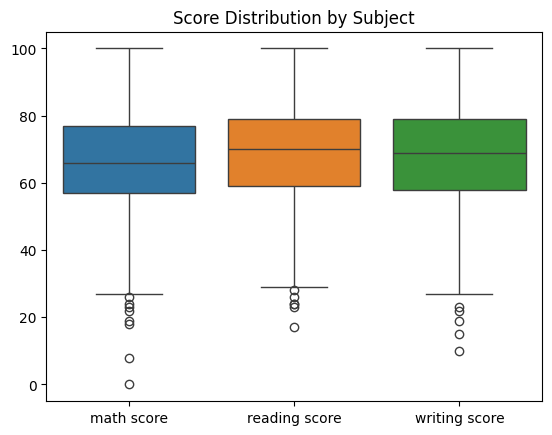

In [91]:
sns.boxplot(data=student_df[['math score', 'reading score', 'writing score']])
plt.title("Score Distribution by Subject")
plt.show()

#### Insights :
Mean: 66.09 → Average math performance is moderately good. || Mean: 69.17 → reading performacne is higher than math. || Mean: 68.05 → writing performance is slightly below reading.
|| Std: ~15.2 → writing has highest variability among the three.


1.3.6 Check various categories for category column

In [92]:
for column in student_df.columns :
    if student_df[column].dtype in ["object", "category"] :
        print(f"{column} is a categorical column")
    else :
        print(f"{column} is a {student_df[column].dtype} column")

gender is a categorical column
race/ethnicity is a categorical column
parental level of education is a categorical column
lunch is a categorical column
test preparation course is a categorical column
math score is a int64 column
reading score is a int64 column
writing score is a int64 column


#### 2.1.1 Exploring Data

In [93]:
print("Categories in 'gender' variable: ", end = " ")
print(student_df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end = " ")
print(student_df['race/ethnicity'].unique())

print("Categories in' parental level of education' variable: ", end = " ")
print(student_df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", end = " ")
print(student_df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end = " ")
print(student_df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in' parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


#### Feature Engineering
##### 3.1.1 Calculating Numerical and Categorical features

In [94]:
# Define numerical and categorical features
numeric_features = [feature for feature in student_df.columns if student_df[feature].dtype in ['int64', 'float64']]
categorical_features = [feature for feature in student_df.columns if student_df[feature].dtype == 'object' or student_df[feature].dtype.name == 'category']

# Print features
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### 3.1.1 Adding and calculating columns "total" and "average"

In [95]:
student_df["total"] = student_df["reading score"] + student_df["writing score"] + student_df["math score"]

student_df["average"] = student_df["total"] / 3

In [96]:
student_df.rename(columns = {"total" : "total_score"}, inplace = True)

In [97]:
student_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


#### 3.1.2 Calculating performacne of the students w.r.t Full Marks and marks below 20

In [98]:
reading_full = student_df[student_df['reading score'] == 100]['average'].count()
writing_full = student_df[student_df['writing score'] == 100]['average'].count()
math_full = student_df[student_df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [102]:
subjects = ['math score', 'reading score', 'writing score']

for subject in subjects:
    score_count = (student_df[subject] <= 20).sum()
    print(f'Number of students with score less than 20 marks in {subject.replace("_", " ").title()} is {score_count}')


Number of students with score less than 20 marks in Math Score is 4
Number of students with score less than 20 marks in Reading Score is 1
Number of students with score less than 20 marks in Writing Score is 3


#### Insights :
From the above points, best performance is in reading exercise and worst is in maths. students perfrmed average - better in writing exercise since only 1 student scored less than 20 marks

#### Data Exploration(Visualization)
4.1.1 Histogram and KDE plots

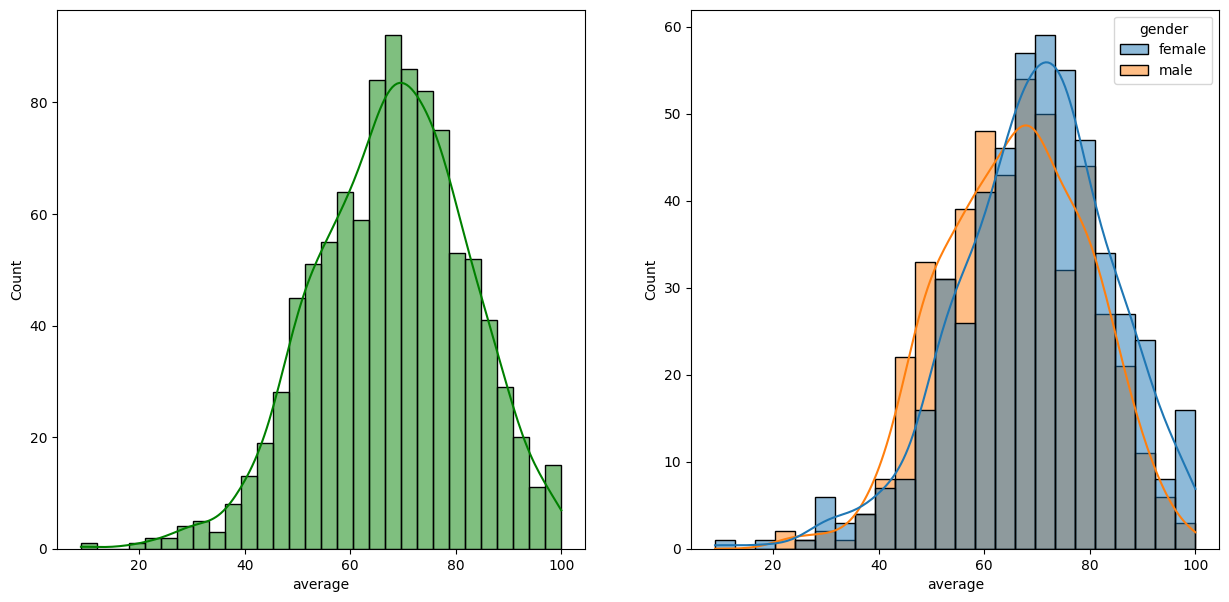

In [103]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = student_df, x = 'average', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = student_df, x ='average', kde = True, hue = 'gender')
plt.show()

#### Insights :
From the abpve graphs, female students generally perform well in exams

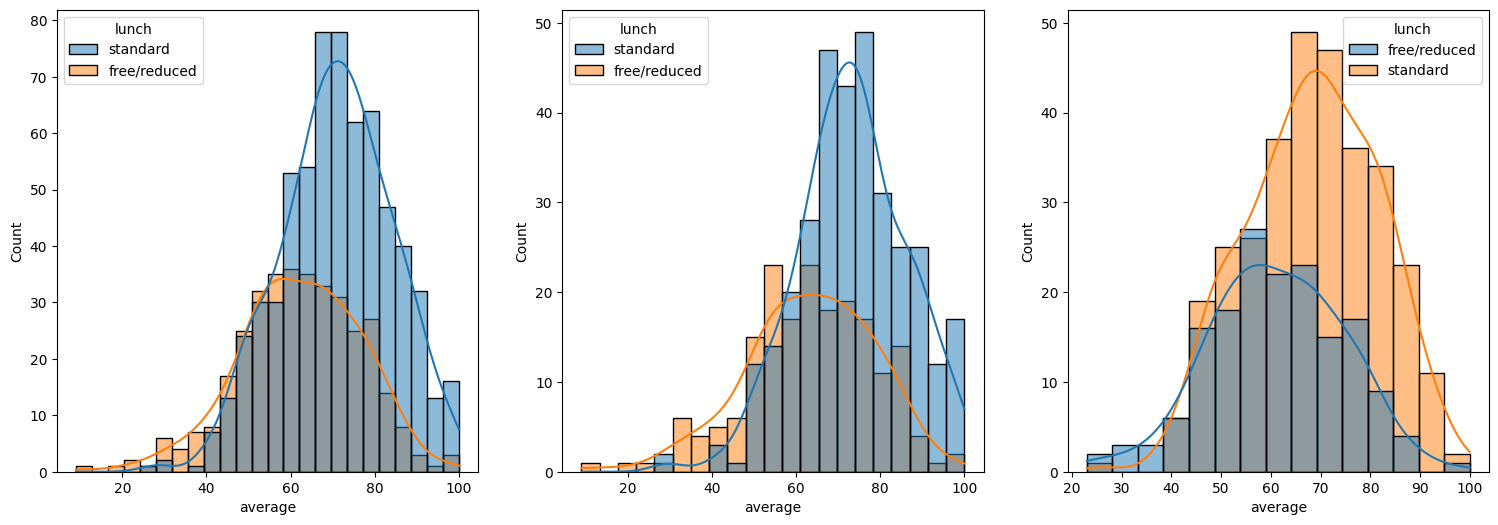

In [104]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data = student_df, x = 'average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = student_df[student_df.gender == 'female'], x = 'average', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = student_df[student_df.gender == 'male'], x = 'average', kde = True, hue = 'lunch')
plt.show()

#### Insights :
From the above graph, standard lunch help student to perform well be it male or female

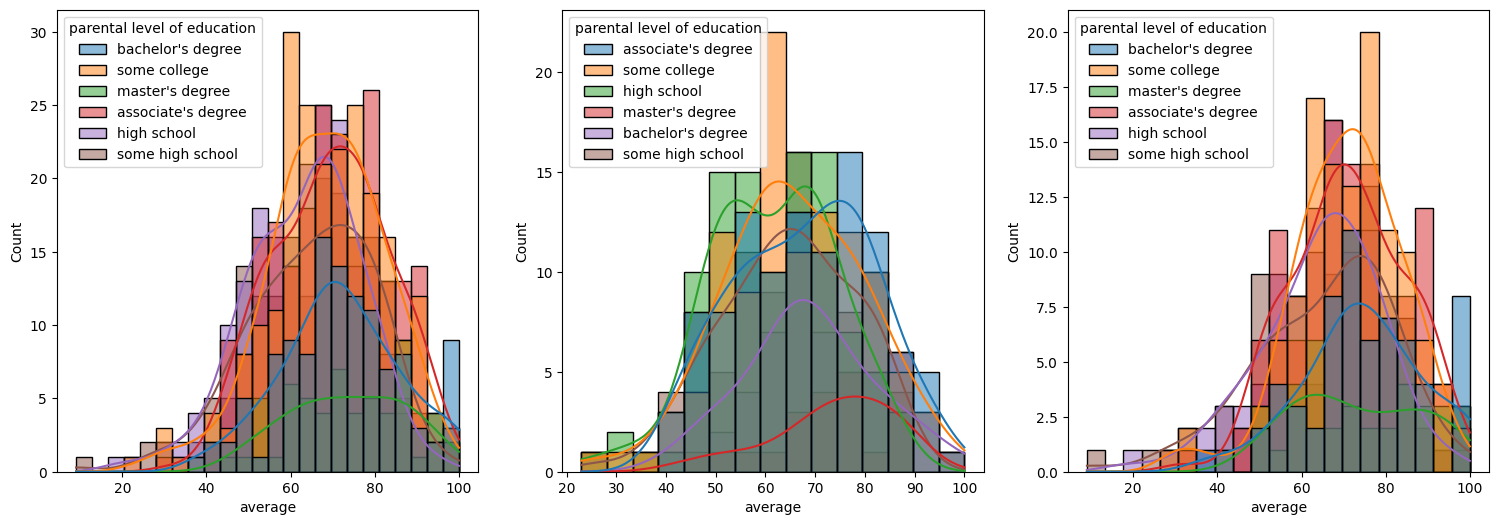

In [105]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
ax = sns.histplot(data = student_df, x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(142)
ax = sns.histplot(data = student_df[student_df.gender == 'male'], x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(143)
ax = sns.histplot(data = student_df[student_df.gender == 'female'], x = 'average', kde = True, hue = 'parental level of education')
plt.show()

#### Insights :
From the above graph, parents education has little to no impact in students performance
As per 2nd graph, parents having their degree in some degree OR assocaite degree have helped students(male) to perform better
As per 3rd graph, parents having their degree in some college OR associate degree have helped female students to perform well.

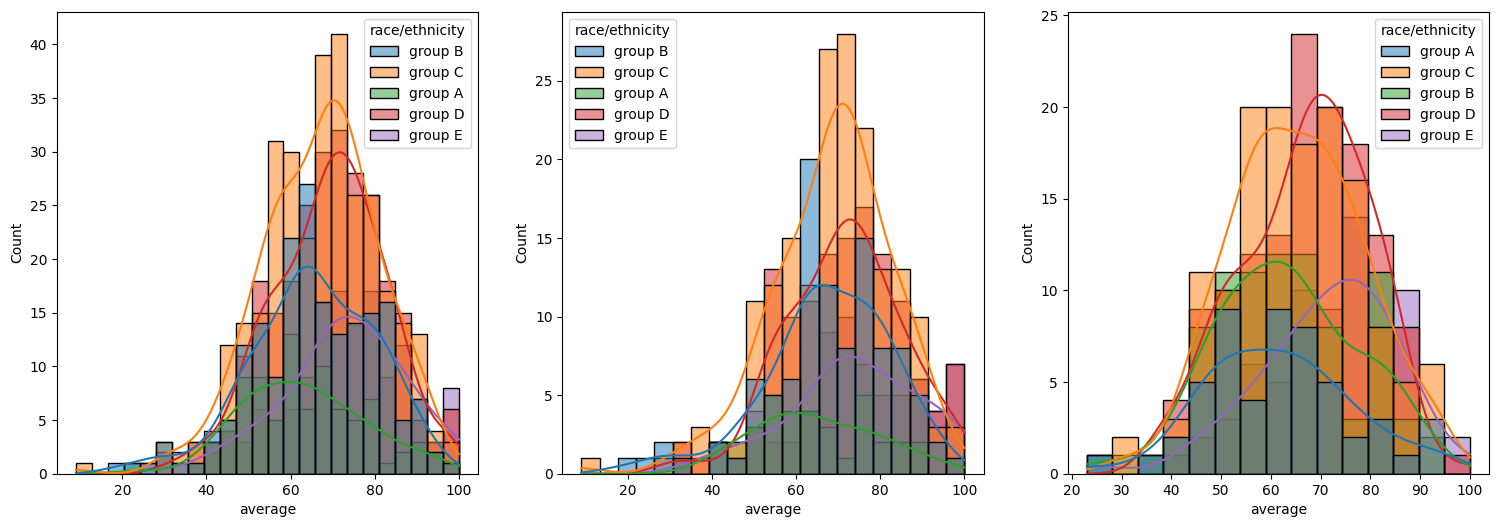

In [106]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=student_df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=student_df[student_df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=student_df[student_df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

####  Insights :
Students of group A and group B tends to perform poorly in exam.
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.1.2 Maximum score of students in all three subjects

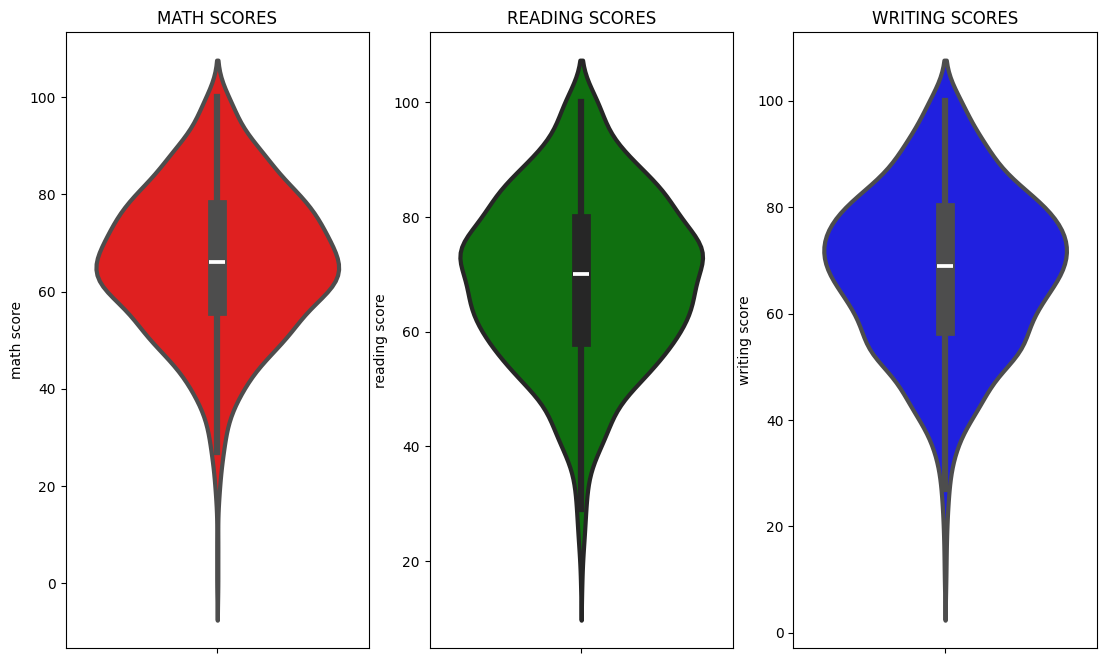

In [108]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=student_df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=student_df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=student_df,color='blue',linewidth=3)
plt.show()

#### Insights :
From the above three plots its clearly visible that most of the students score in between 50-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.1.3 Multivariate Analysis

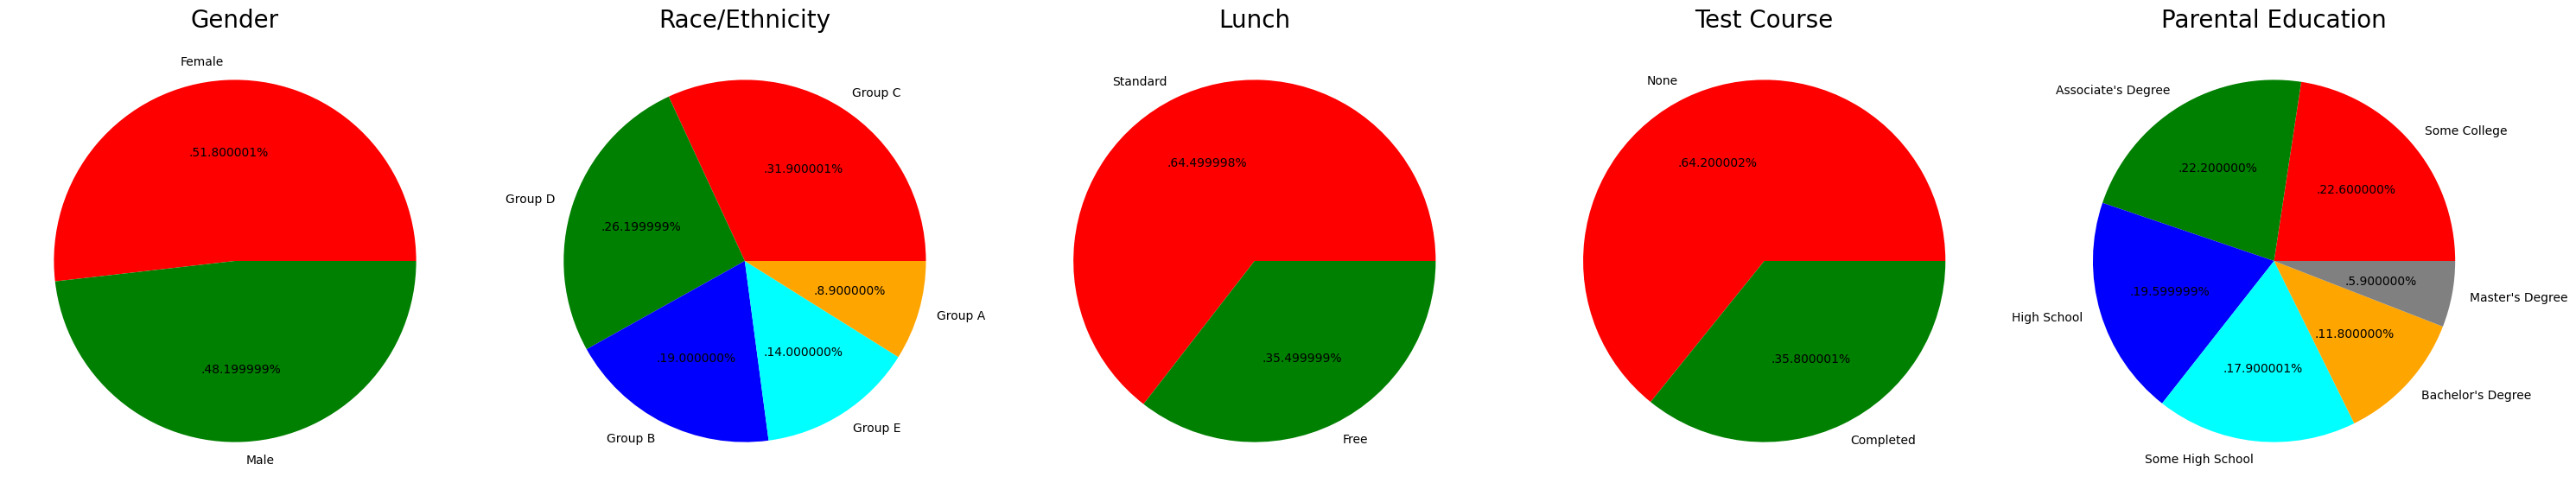

In [109]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = student_df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = student_df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = student_df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = student_df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = student_df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

####  Insights :
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 5.1 Feature wise visualization
5.1.1 Gender column - Univariate Analysis

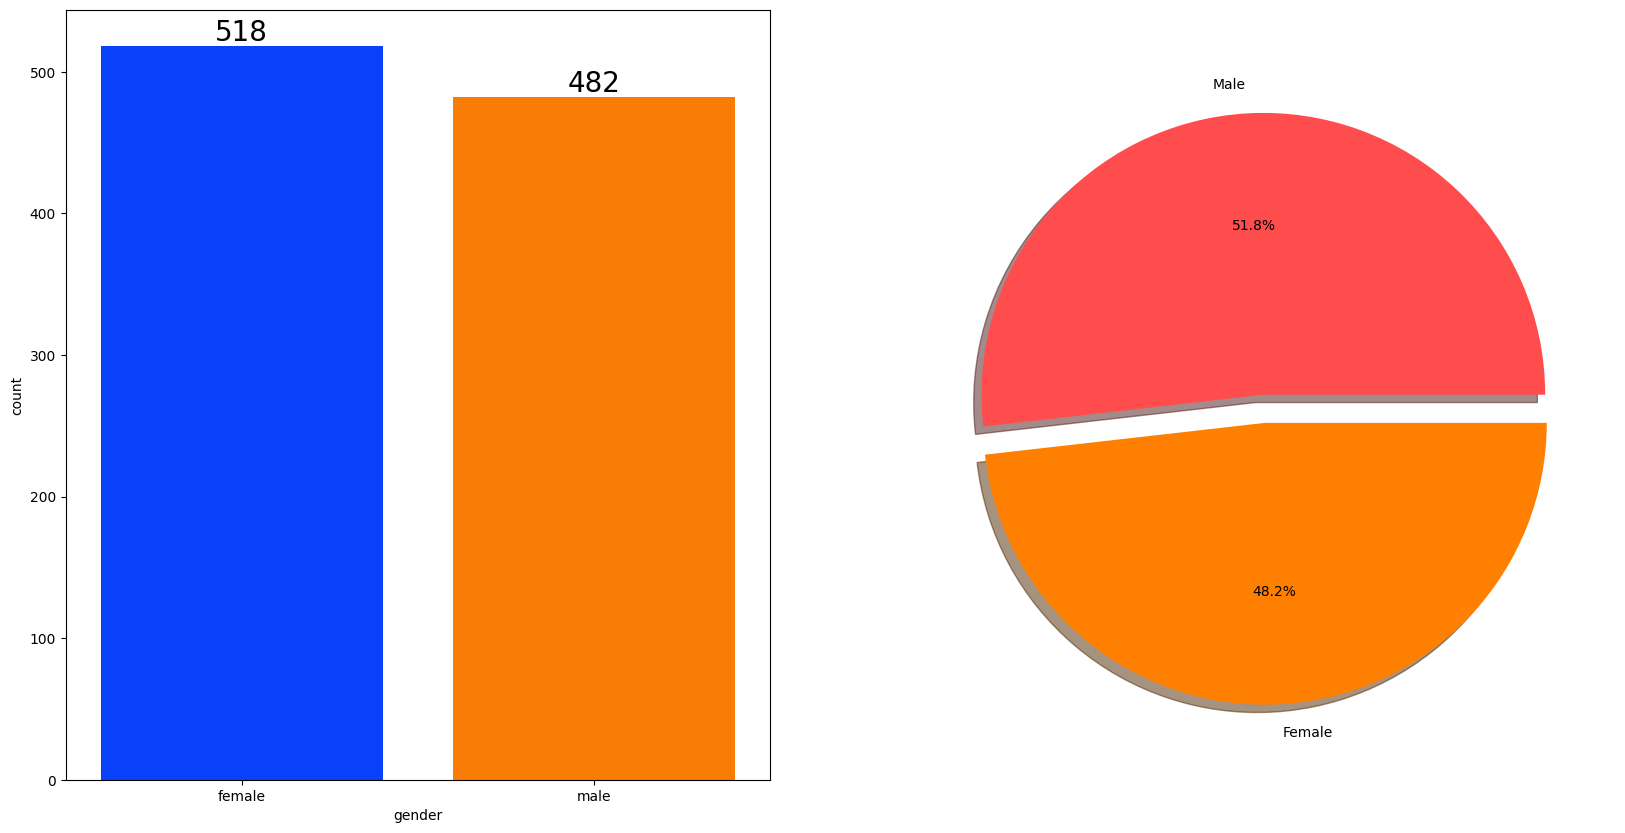

In [111]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=student_df['gender'],data=student_df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=student_df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights :
Gender has almost balanced data with female as 48.2 % and male as 51.8 %

#### 5.1.2 Bi-variate analysis

In [116]:
student_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [123]:
gender_group = student_df.groupby('gender').mean(numeric_only=True)

gender_group

,math score,reading score,writing score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


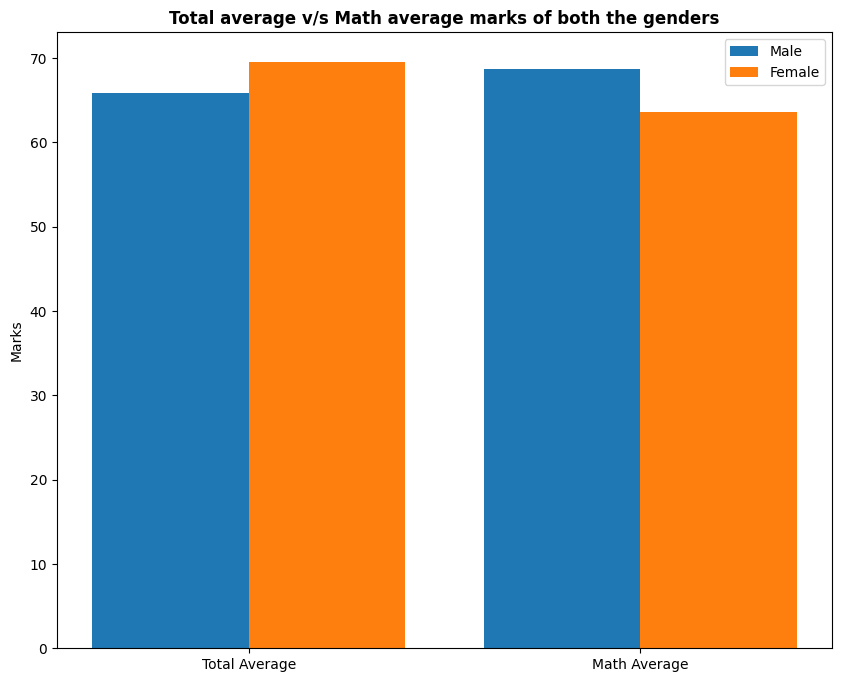

In [124]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights :
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.2.2 Race/Ethenticity column

##### Univariate Analysis

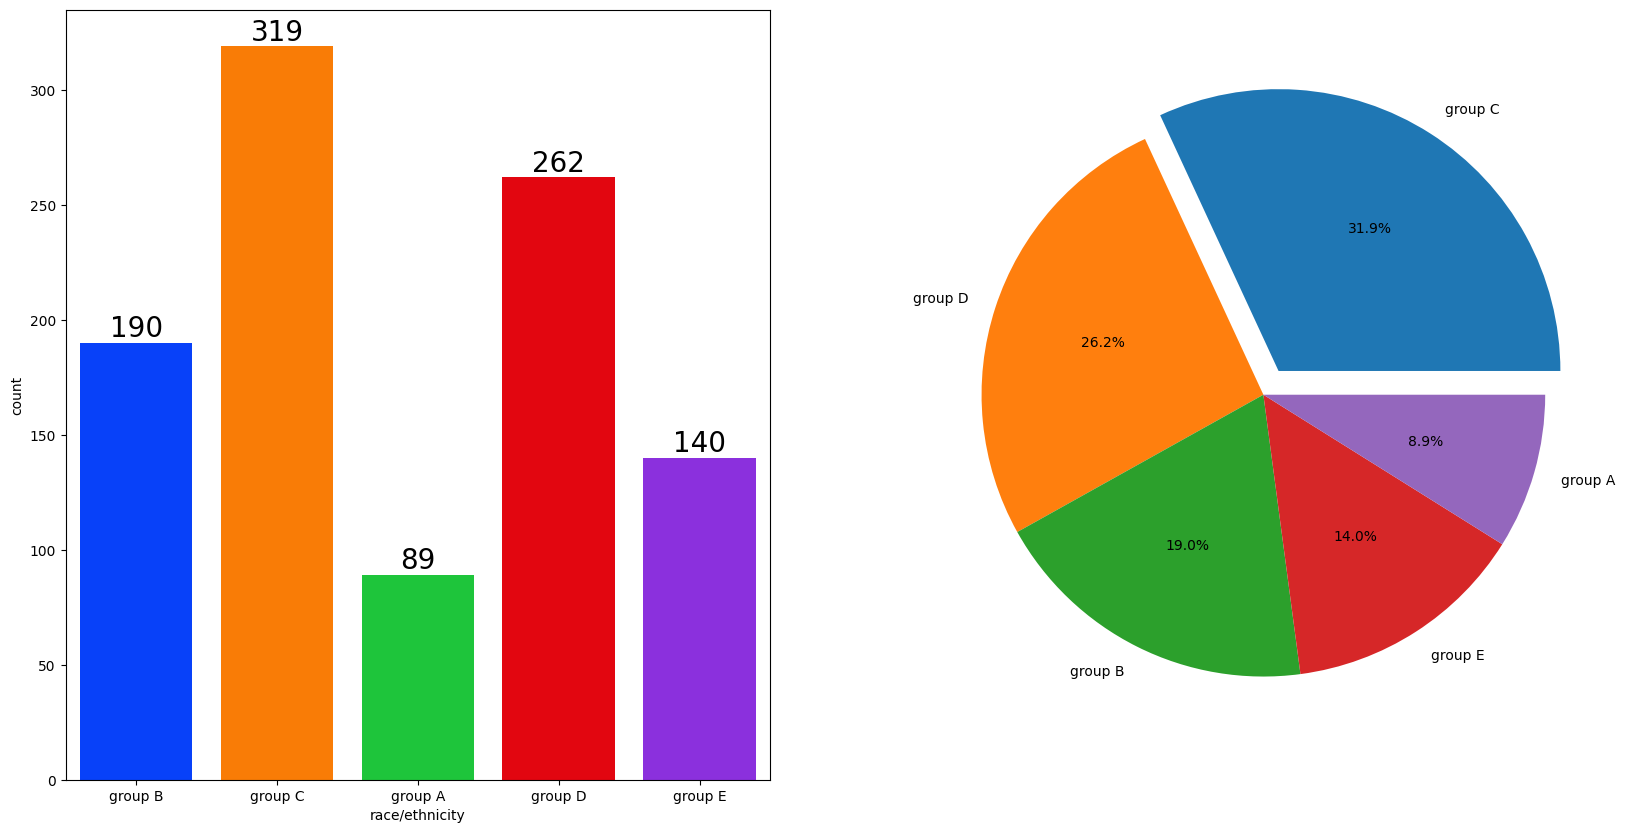

In [126]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=student_df['race/ethnicity'],data=student_df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = student_df['race/ethnicity'].value_counts(),labels=student_df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=False)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### Bivariate Analysis

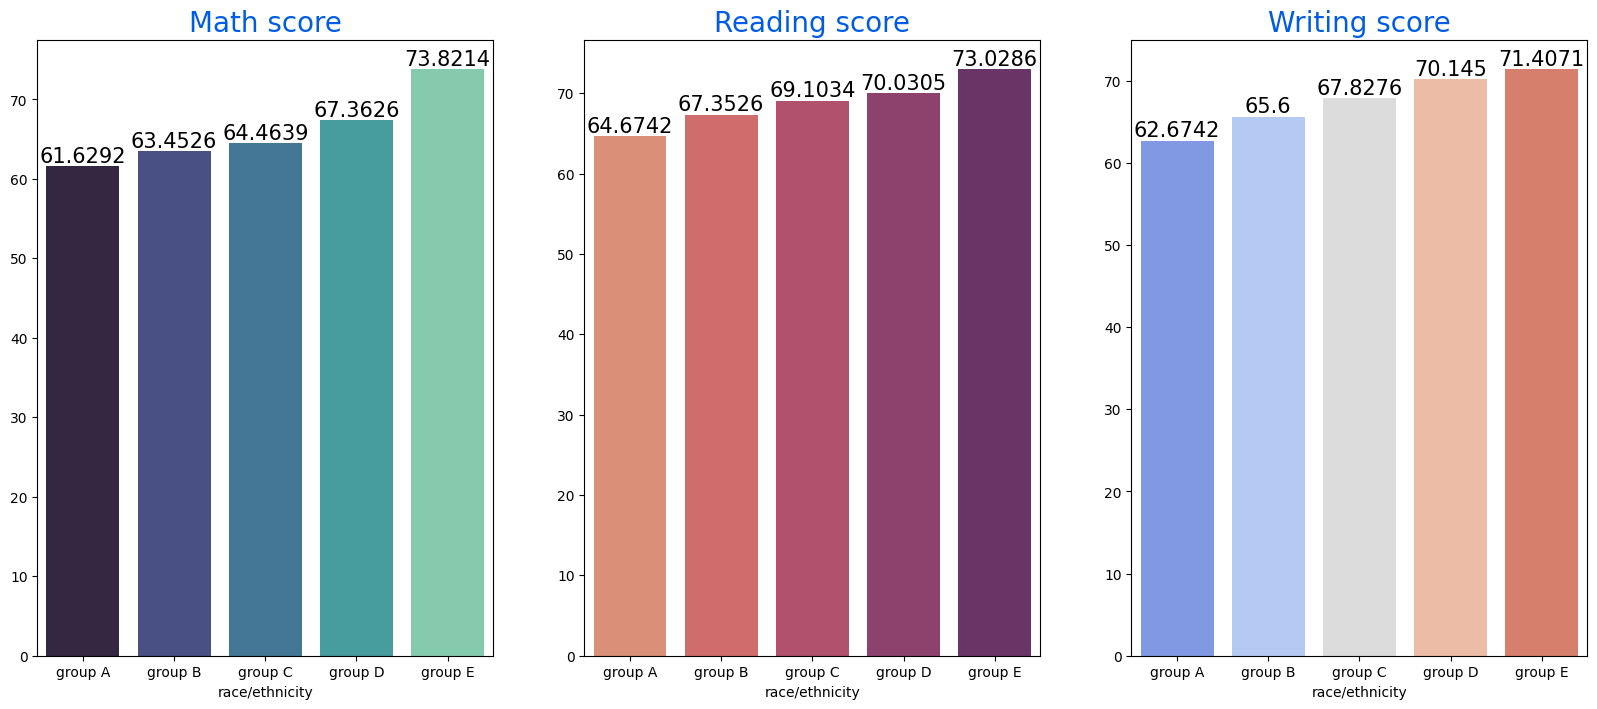

In [127]:
Group_data2=student_df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights :
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.2.3 Parental Level of Education

#### Univariate Analysis

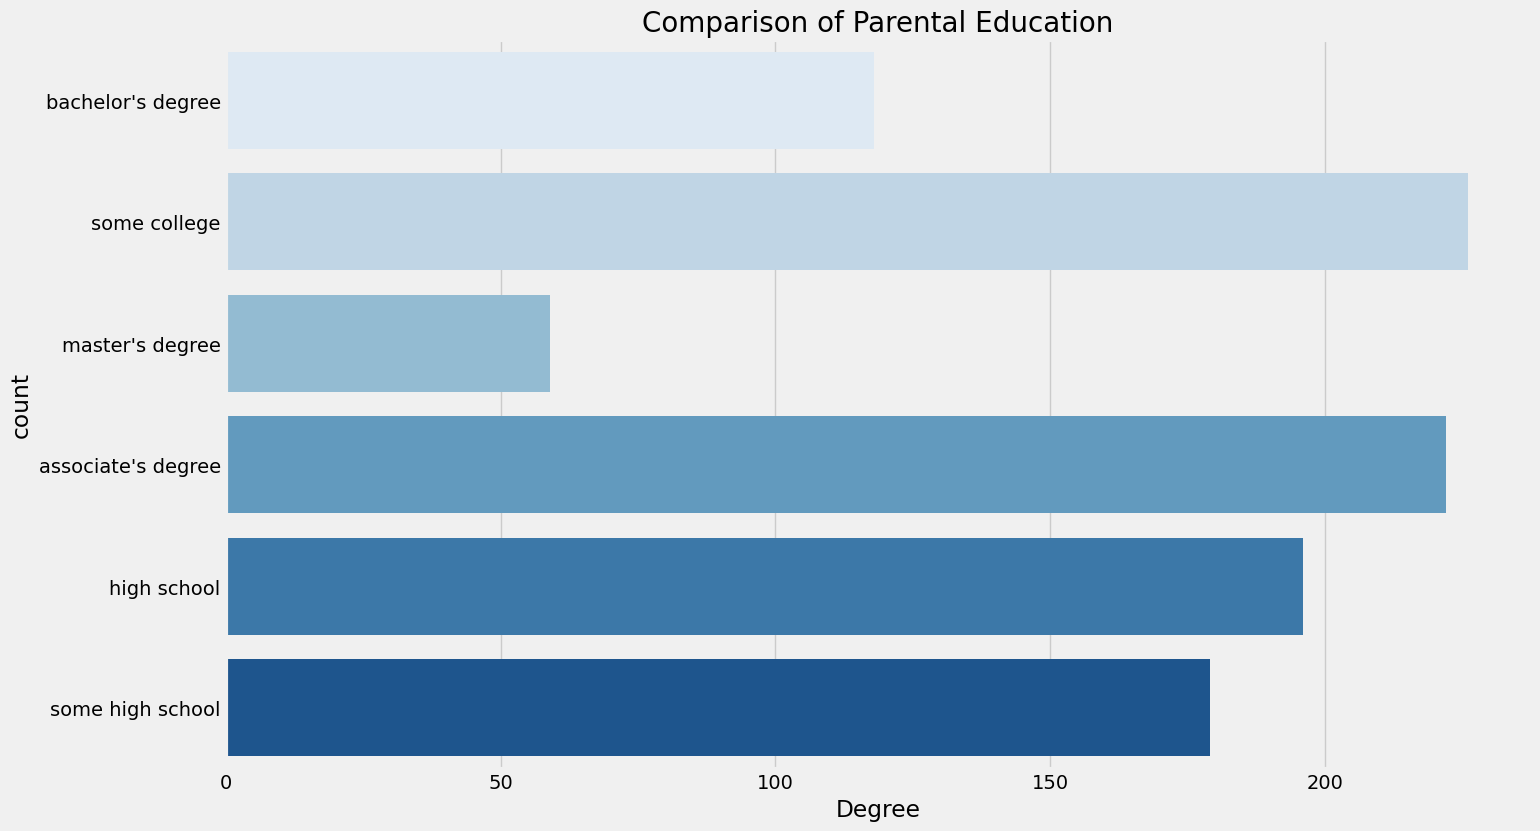

In [128]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(student_df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### Bi-variate Analysis

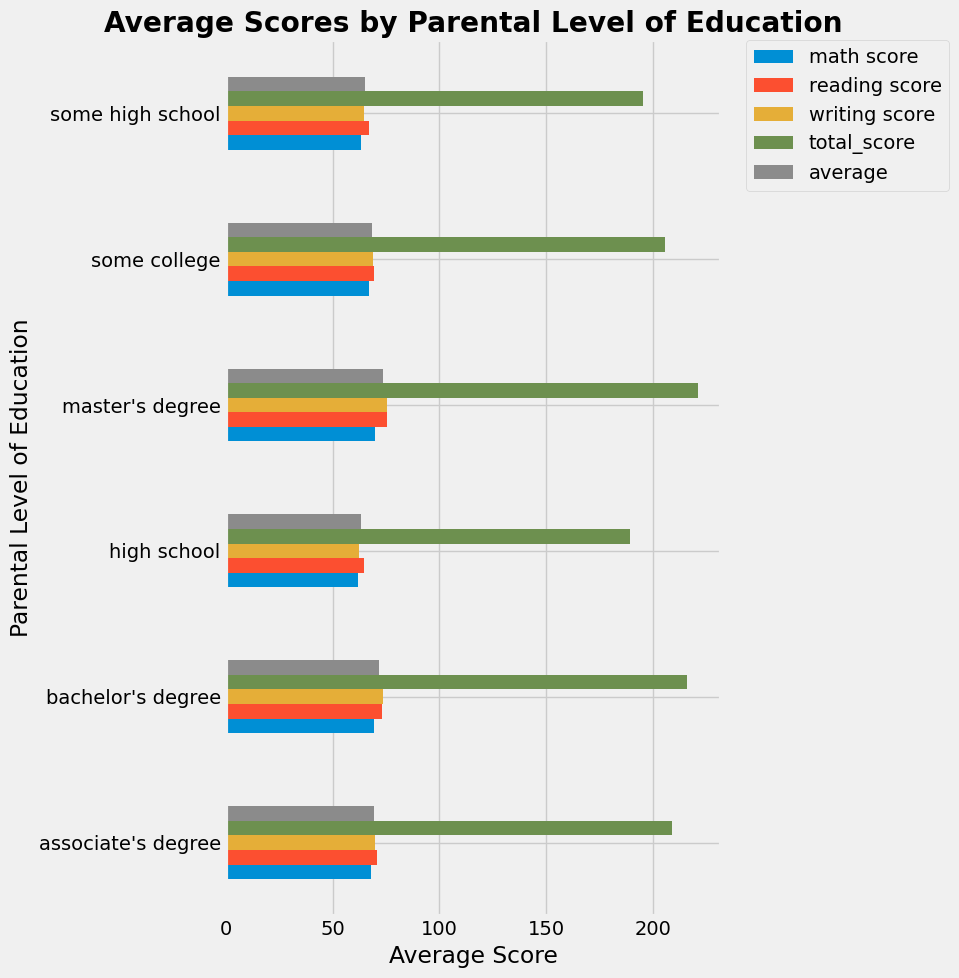

In [130]:
grouped_df = student_df.groupby('parental level of education').mean(numeric_only=True)
grouped_df.plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Average Scores by Parental Level of Education", fontweight='bold')
plt.xlabel("Average Score")
plt.ylabel("Parental Level of Education")
plt.tight_layout()
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.2.4 Lunch column

#### Univariate Analysis

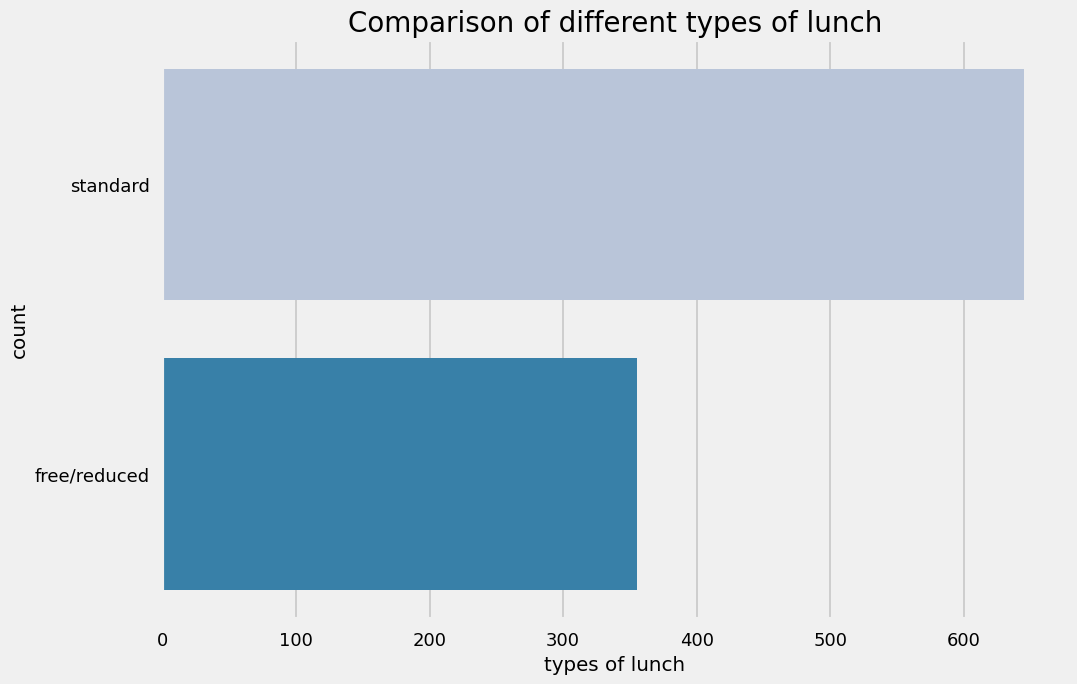

In [131]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(student_df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was morae athan free lunch

#### Bi-variate Analysis

NameError: name 'df' is not defined

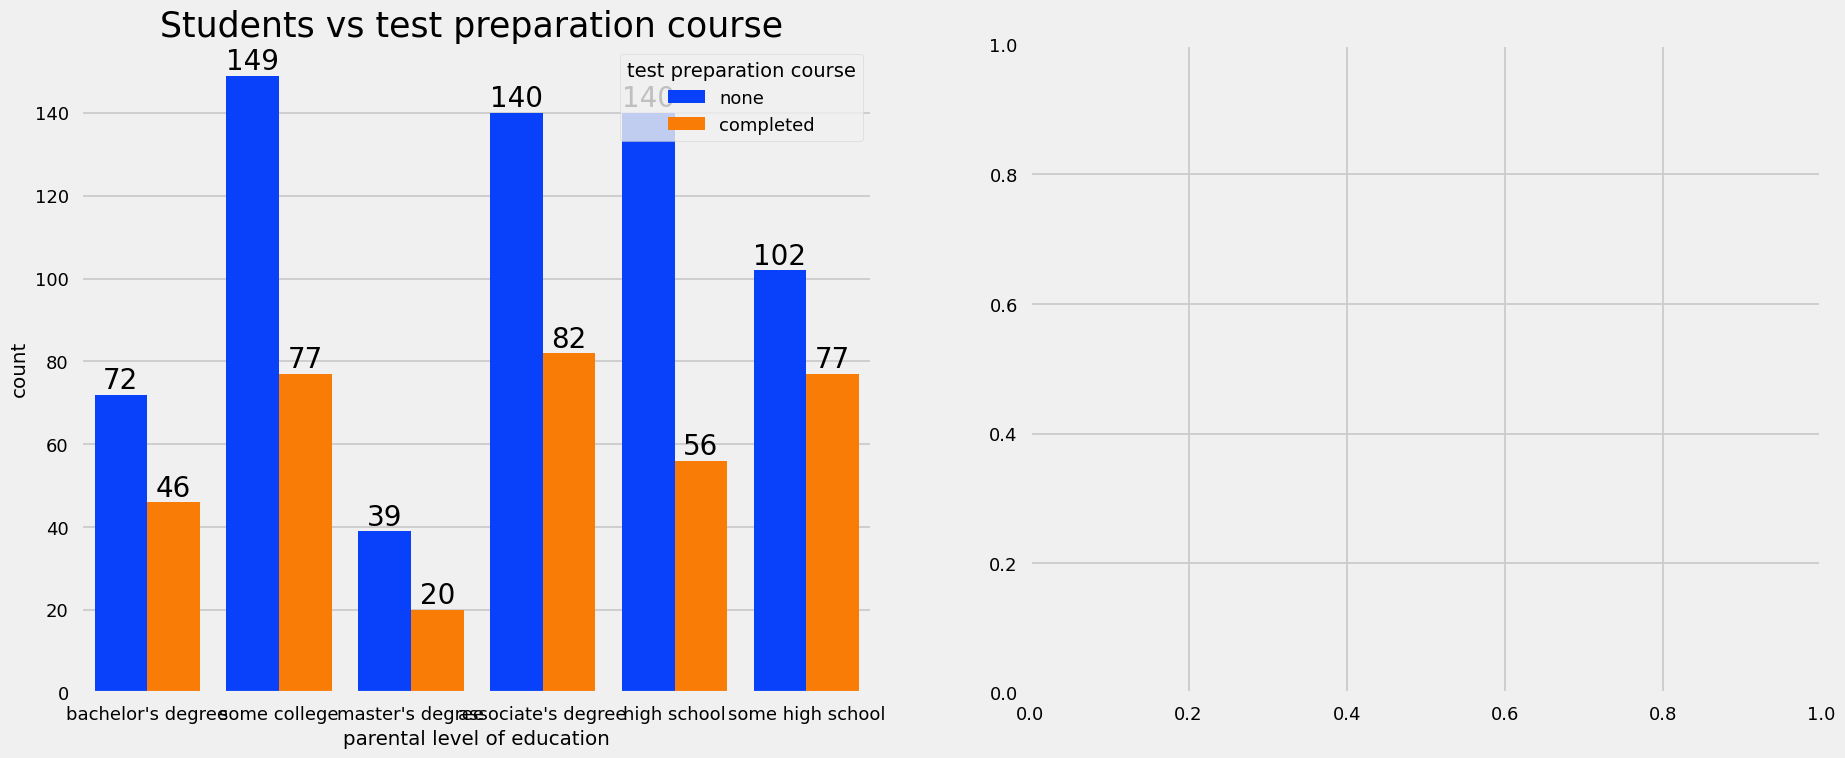

In [133]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=student_df['parental level of education'],data=student_df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=student_df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better thaan students who got free/reduced lunch

#### 4.4.5 Test Preparation Course column

#### Bi-variate Analysis

<Axes: xlabel='lunch', ylabel='writing score'>

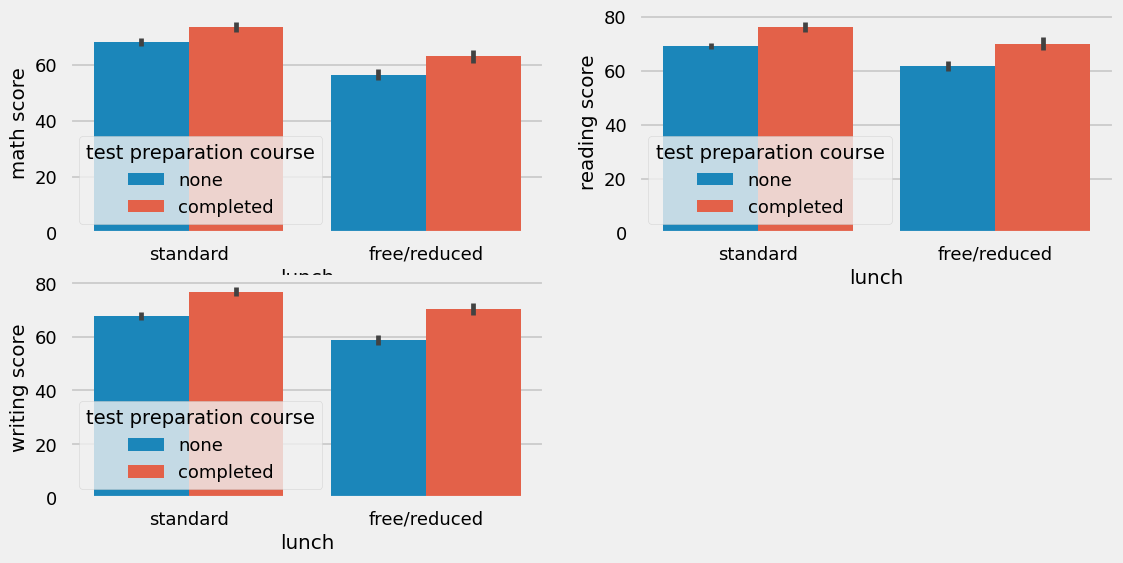

In [134]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=student_df['lunch'], y=student_df['math score'], hue=student_df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=student_df['lunch'], y=student_df['reading score'], hue=student_df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=student_df['lunch'], y=student_df['writing score'], hue=student_df['test preparation course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 Checking Outliers

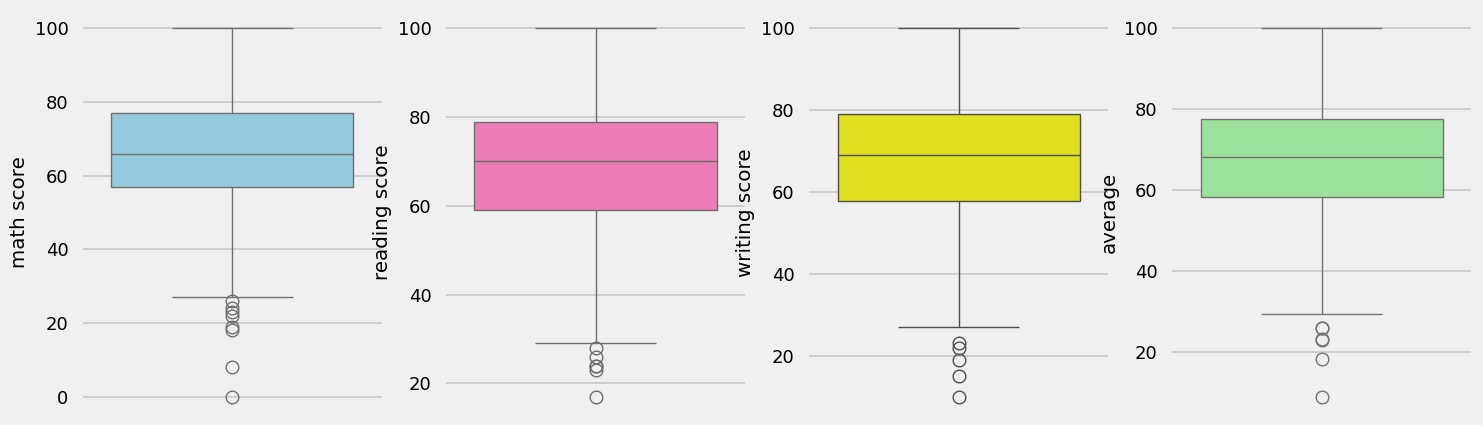

In [135]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(student_df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(student_df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(student_df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(student_df['average'],color='lightgreen')
plt.show()

#### Multi-variate Analysis

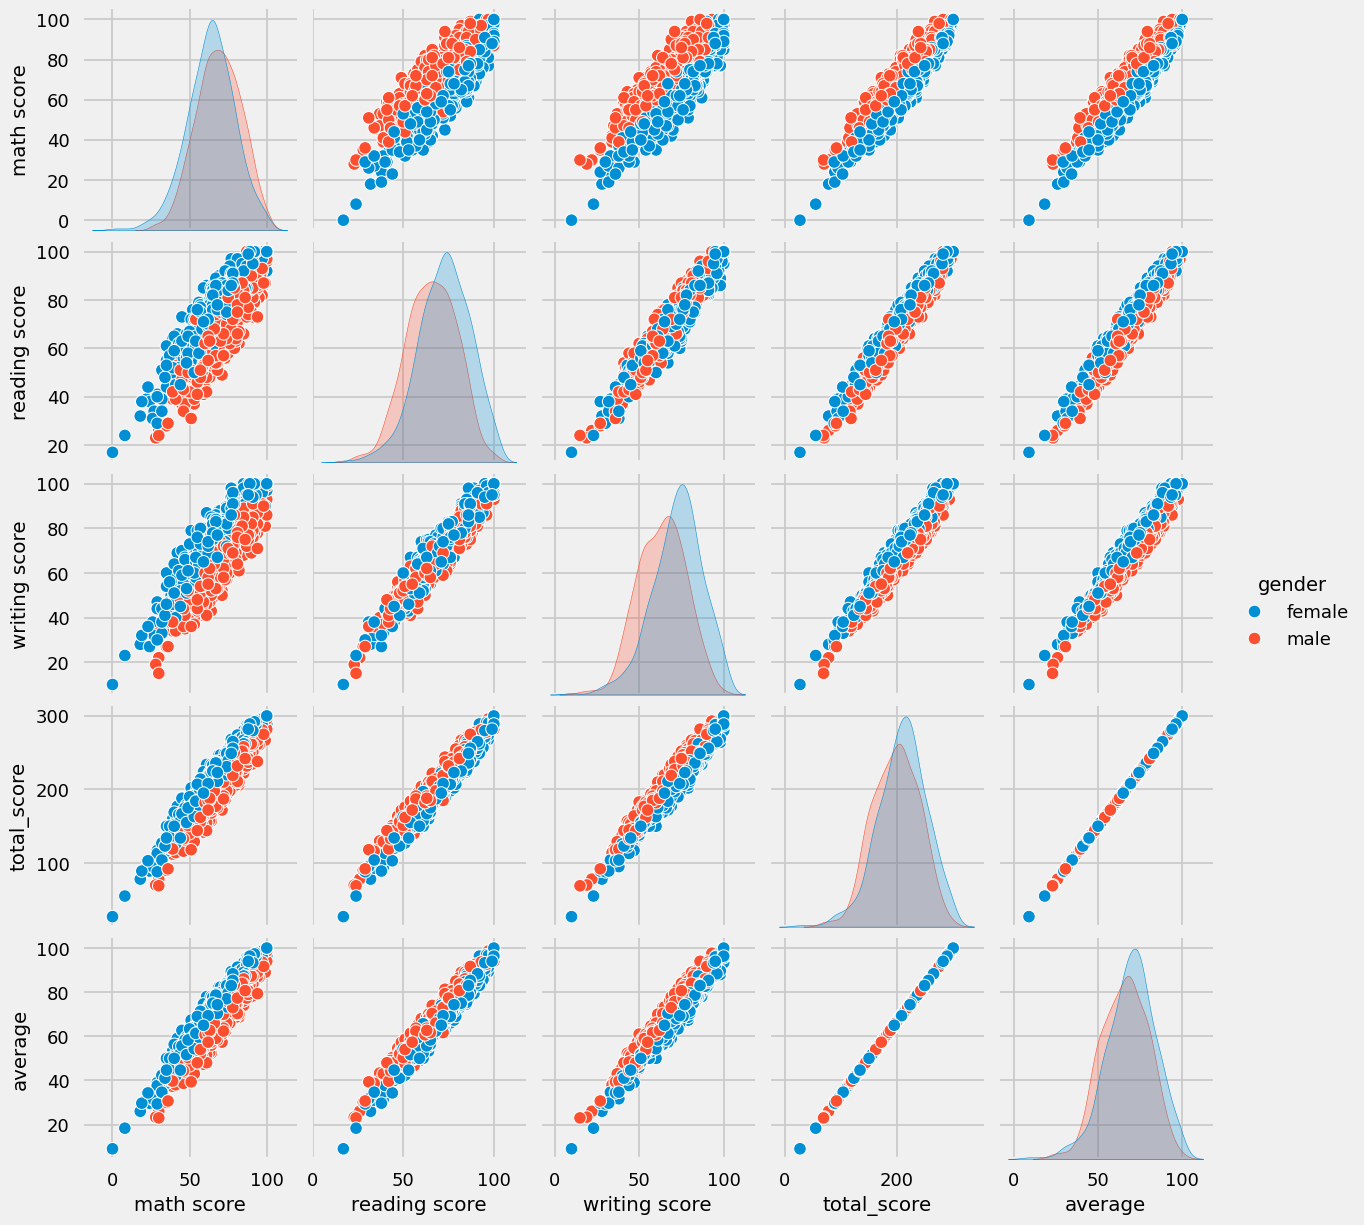

In [136]:
sns.pairplot(student_df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.